In [1]:
%matplotlib inline

import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


## 3.1

### a.

In [3]:
shipments = pd.read_csv('D:\숙탯 2기\dmba-datasets\ApplianceShipments.csv')
shipments

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123
5,Q2-1986,4522
6,Q3-1986,4657
7,Q4-1986,4030
8,Q1-1987,4493
9,Q2-1987,4806


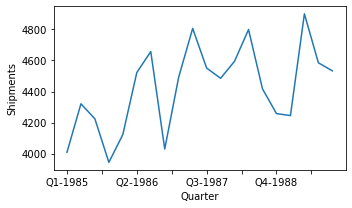

In [8]:
shipments_ts = pd.Series(shipments['Shipments'].values, index=shipments['Quarter'])
shipments_ts.plot(legend=False, figsize=[5, 3])
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.tight_layout()
plt.show()

### b.

<AxesSubplot:xlabel='Quarter'>

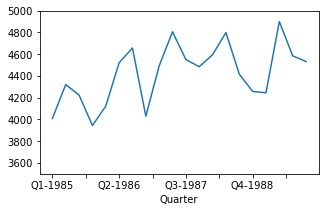

In [10]:
shipments_ts.plot(ylim = [3500, 5000], legend=False, figsize=[5, 3])

### c.

In [25]:
shipments['Year'] = shipments['Quarter'].str[3:]

In [27]:
shipments_Q1 = shipments[shipments['Quarter'].str.contains('Q1')]
shipments_Q2 = shipments[shipments['Quarter'].str.contains('Q2')]
shipments_Q3 = shipments[shipments['Quarter'].str.contains('Q3')]
shipments_Q4 = shipments[shipments['Quarter'].str.contains('Q4')]

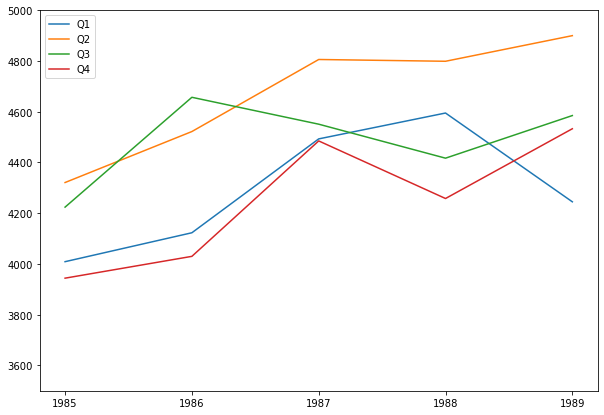

In [46]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(shipments_Q1['Year'], shipments_Q1['Shipments'], label = 'Q1', c = 'C0')
ax.plot(shipments_Q2['Year'], shipments_Q2['Shipments'], label = 'Q2', c = 'C1')
ax.plot(shipments_Q3['Year'], shipments_Q3['Shipments'], label = 'Q3', c = 'C2')
ax.plot(shipments_Q4['Year'], shipments_Q4['Shipments'], label = 'Q4', c = 'C3')

ax.legend()

ax.set_ylim([3500, 5000])

plt.show()

### d.

Text(0, 0.5, 'Sum of Shipments')

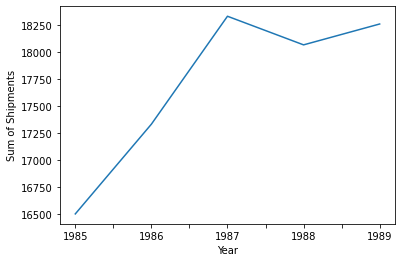

In [89]:
shipments.groupby(by = 'Year').sum().plot(legend = False)
plt.ylabel('Sum of Shipments')

## 3.2 - a

In [96]:
Mowers = pd.read_csv('D:\숙탯 2기\dmba-datasets\RidingMowers.csv')
Mowers

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


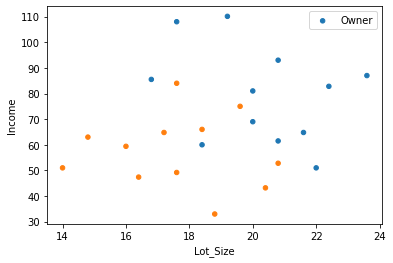

In [107]:
Mowers.plot.scatter(x='Lot_Size', y='Income', c=['C0' if c == 'Owner' else 'C1' for c in Mowers.Ownership])

plt.legend(['Owner'])
plt.show()

## 3.3

### a.

In [112]:
laptop = pd.read_csv('D:\숙탯 2기\dmba-datasets\LaptopSalesJanuary2008.csv')
laptop

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0,2405.873022
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0,2507.558574
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0,3194.001409
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0,4155.202281
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0,3729.298057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,1/31/2008 23:30,296,EC4V 6DE,SW1P 3AU,540,15,6,1,1.5,Yes,300,No,531801,181101,529902.0,179641.0,2395.370744
7952,1/31/2008 23:43,210,SE24 0NJ,SW1P 3AU,415,15,5,2,2.0,Yes,40,No,531580,174507,529902.0,179641.0,5401.262815
7953,1/31/2008 23:50,222,WC2H 0EA,NW5 2QH,455,15,5,2,2.0,No,120,No,529827,181231,529248.0,185213.0,4023.874377
7954,1/31/2008 23:57,196,W1D 3SU,SW1P 3AU,430,15,5,2,1.5,Yes,80,No,529614,181198,529902.0,179641.0,1583.411823


In [142]:
Mean = laptop.groupby('Store Postcode').mean()['Retail Price'].sort_values(ascending = False)
Mean

Store Postcode
N17 6QA     494.634146
E7 8NW      494.381443
KT2 5AU     493.904762
SW18 1NN    493.038922
SE8 3JD     492.177778
W10 6HQ     489.866667
SW1V 4QQ    489.344978
CR7 8LE     488.619048
SW1P 3AU    488.506858
N3 1DH      487.368421
SE1 2BN     486.680195
NW5 2QH     486.580460
S1P 3AU     486.250000
SW12 9HD    485.295699
E2 0RY      483.171729
W4 3PH      481.006289
Name: Retail Price, dtype: float64

* 평균 소매가격 가장 높은 매장 : N17 6QA
* 평균 소매가격 가장 낮은 매장 : W4 3PH

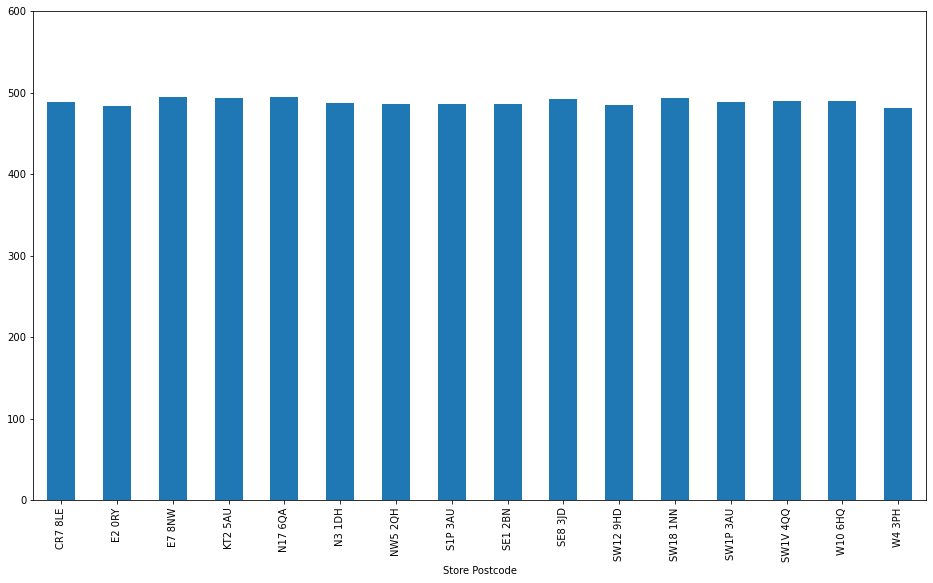

In [125]:
fig, ax = plt.subplots(figsize = (16, 9))
Mean.plot.bar()
plt.ylim([0, 600])
plt.show()

### b.

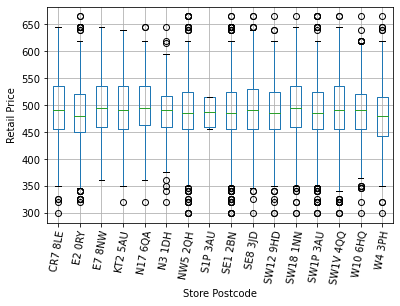

In [139]:
ax = laptop.boxplot(column='Retail Price', by='Store Postcode')
ax.set_ylabel('Retail Price')
plt.xticks(rotation = 80)
plt.suptitle('')
plt.title('')

plt.show()